# Electricty Production

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Electric_Production.csv')
df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [3]:
df.shape

(397, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        397 non-null    datetime64[ns]
 1   IPG2211A2N  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [7]:
df.columns = ['date', 'units']

In [8]:
df.head(2)

,date,units
0,1985-01-01,72.5052
1,1985-02-01,70.6720


In [9]:
df.set_index('date', inplace = True)

In [10]:
print('star date ',df.index[0],',', 'end date ,', df.index[-1])

star date  1985-01-01 00:00:00 , end date , 2018-01-01 00:00:00


<Axes: xlabel='date'>

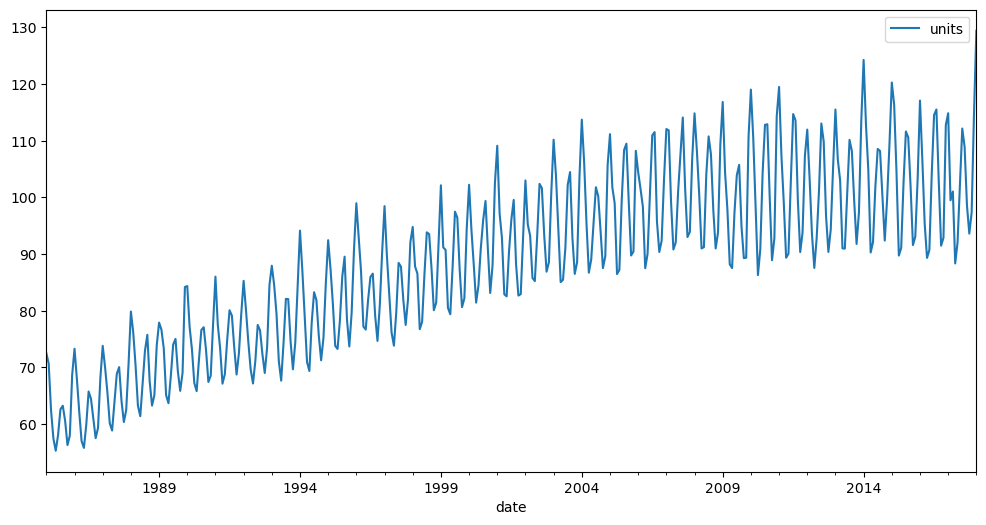

In [11]:
df.plot(figsize = (12,6))

In [12]:
df.head(13)

,units
date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


<Axes: xlabel='date'>

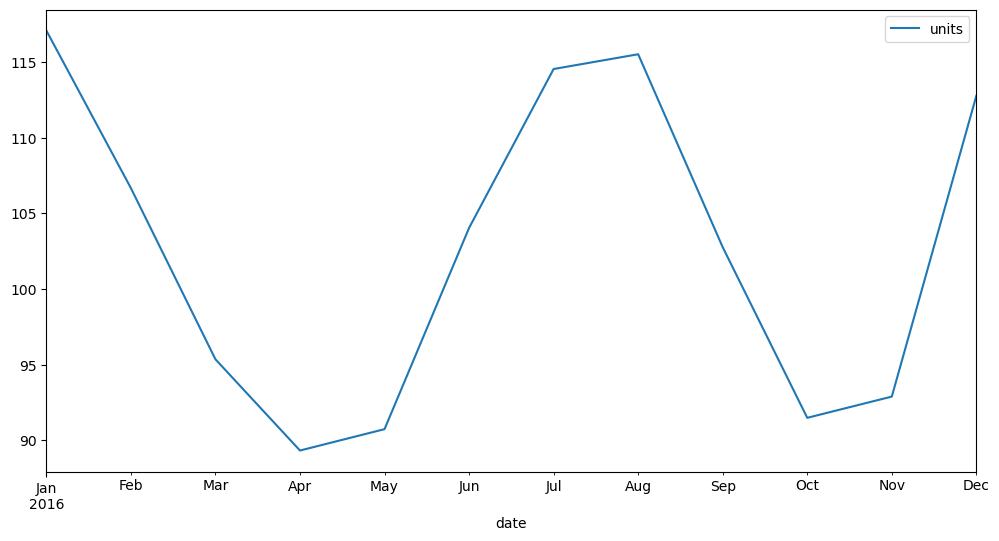

In [13]:

df['2016-01-01':'2016-12-01'].plot(figsize =(12,6))

In [14]:
# for check data trend, seasonlity
from statsmodels.tsa.seasonal import seasonal_decompose


Text(0.5, 0.98, 'Multiplicatve model')

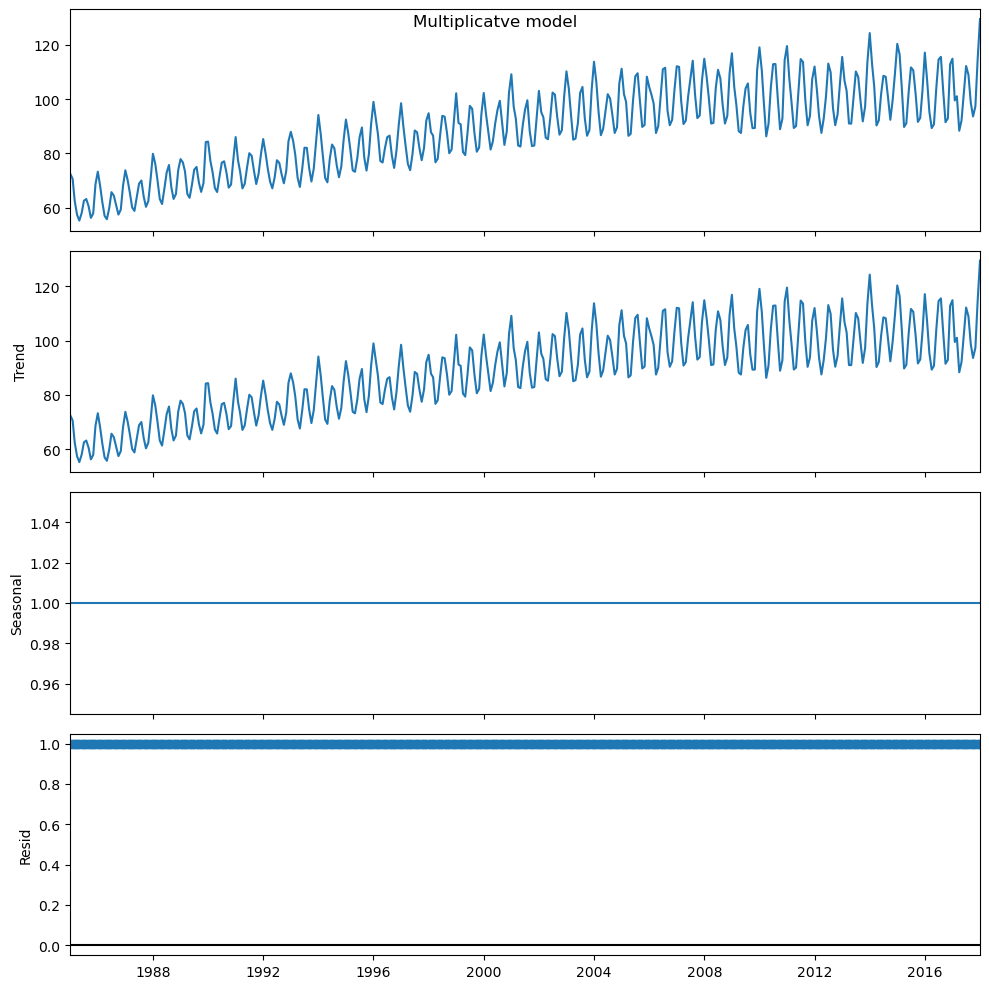

In [15]:
mul_result = seasonal_decompose(df, model ='multiplicative', period=1)

from pylab import rcParams
rcParams['figure.figsize'] = 10,10

mul_result.plot().suptitle('Multiplicatve model')


# so data have no seasonlity
# data is seaonalioty and tredn both are availiable

In [16]:
## Let's check data is Stationary or not

In [17]:
from statsmodels.tsa.stattools import adfuller # for test data is stationary or not

In [18]:
# null hypo (Ho): It is non stationary
# Alternative hypo (H1): It is stationary

# if  p value <= 0.05  than reject null hypo (ho), conclusion - data is stionary
# if p value > 0.05 than accept null hypo (ho), conclusion - data is not stionary


def adafuller_test(series):
    result = adfuller(series)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [19]:
adafuller_test(df['units'])

# so ddata is not stionary

ADF Test Statistic : -2.25699035004725
p-value : 0.18621469116586592
#Lags Used : 15
Number of Observations Used : 381
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
### let's make data stationary

df['difference first units'] = df['units'] - df['units'].shift(1)
df.head()

,units,difference first units
date,,
1985-01-01,72.5052,NaN
1985-02-01,70.6720,-1.8332
1985-03-01,62.4502,-8.2218
1985-04-01,57.4714,-4.9788
1985-05-01,55.3151,-2.1563


In [21]:
# let's again check

adafuller_test(df['difference first units'].dropna())

# good p value < 0.05 

ADF Test Statistic : -7.104890882267312
p-value : 4.0777865655394095e-10
#Lags Used : 14
Number of Observations Used : 381
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [22]:
## let's data is seasonal we crwate new columns for 12 month

df['Seasonal first Units'] = df['units'] - df['units'].shift(12)
df.head()

,units,difference first units,Seasonal first Units
date,,,
1985-01-01,72.5052,NaN,NaN
1985-02-01,70.6720,-1.8332,NaN
1985-03-01,62.4502,-8.2218,NaN
1985-04-01,57.4714,-4.9788,NaN
1985-05-01,55.3151,-2.1563,NaN


In [23]:
adafuller_test(df['Seasonal first Units'].dropna())

# good this also statioanry

ADF Test Statistic : -5.673482023381753
p-value : 8.812644938089282e-07
#Lags Used : 12
Number of Observations Used : 372
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [24]:
# Let's find p,q,d values usung acf and pacd graph
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#### ACF plot 
  find q values

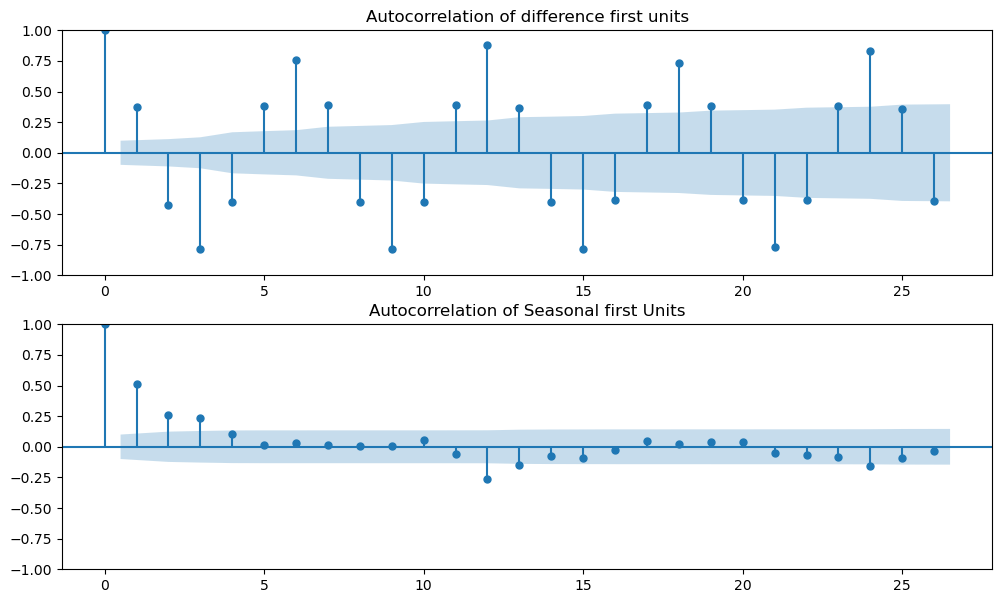

In [25]:
fig = plt.figure(figsize = (12,7))

ax1 = fig.add_subplot(2,1,1)
fig1 = plot_acf(df['difference first units'].dropna(), ax = ax1, title = 'Autocorrelation of difference first units')

ax2 = fig.add_subplot(2,1,2)
fig1 = plot_acf(df['Seasonal first Units'].dropna(), ax = ax2, title = 'Autocorrelation of Seasonal first Units')

# q = 1

### PACF graph
     find p values

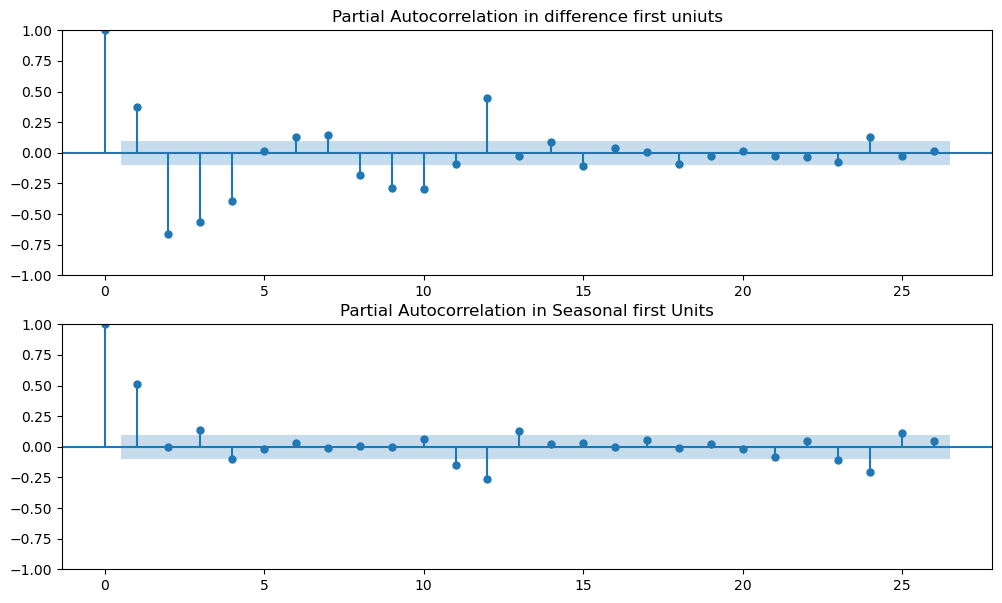

In [26]:
fig = plt.figure(figsize = (12,7))

ax1 = fig.add_subplot(2,1,1)
fig1 = plot_pacf(df['difference first units'].dropna(), ax = ax1, title = 'Partial Autocorrelation in difference first uniuts')

ax2 = fig.add_subplot(2,1,2)
fig1 = plot_pacf(df['Seasonal first Units'].dropna(), ax = ax2, title = 'Partial Autocorrelation in Seasonal first Units')

# p =1

In [27]:
# let's data split train and test

train_data = df['1985-01-01': '2007-12-01']
test_data = df['2008-01-01':]

display(train_data)
display(test_data)

,units,difference first units,Seasonal first Units
date,,,
1985-01-01,72.5052,NaN,NaN
1985-02-01,70.6720,-1.8332,NaN
1985-03-01,62.4502,-8.2218,NaN
1985-04-01,57.4714,-4.9788,NaN
1985-05-01,55.3151,-2.1563,NaN
...,...,...,...
2007-08-01,114.1036,6.5350,2.5844
2007-09-01,101.5316,-12.5720,5.7684
2007-10-01,93.0068,-8.5248,2.6330


,units,difference first units,Seasonal first Units
date,,,
2008-01-01,114.8331,8.0803,2.7755
2008-02-01,108.2353,-6.5978,-3.6046
2008-03-01,100.4386,-7.7967,1.2461
2008-04-01,90.9944,-9.4442,0.1767
2008-05-01,91.2348,0.2404,-0.8239
...,...,...,...
2017-09-01,98.6154,-10.3158,-4.1483
2017-10-01,93.6137,-5.0017,2.1270
2017-11-01,97.3359,3.7222,4.4459


## Let;s use first ARIMA Model

In [28]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA 



In [58]:
arima_model = ARIMA(train_data['units'], order = (2,1,4)) # (p,d,q)

arima_model_fit = arima_model.fit()

arima_model_fit.summary()

C:\Users\Anil modi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anil modi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anil modi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anil modi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  units   No. Observations:                  276
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -693.040
Date:                Thu, 21 Dec 2023   AIC                           1400.081
Time:                        20:34:25   BIC                           1425.398
Sample:                    01-01-1985   HQIC                          1410.242
                         - 12-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.003    356.043      0.000       0.994       1.005
ar.L2         -0.9999      0.000  -3268.246      0.000      -1.000      -0.999
ma.L1         -1.2900      0.050    -25.598      0.000      -1.389      -1.191
ma.L2          0.9140      0.098      9.315      0.000       0.722       1.106
ma.L3          0.0283      0.104      0.273      0.785      -0.175       0.231
ma.L4         -0.3863      0.066     -5.811      0.000      -0.517      -0.256
sigma2         8.5818      0.638     13.452      0.000       7.331       9.832
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 8.49
Prob(Q):                              0.79   Prob(JB):                         0.01
Heteroskedasticity (H):               1.74   Skew:                             0.25
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
## Prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

print(pred_start_date)
print(pred_end_date)

2008-01-01 00:00:00
2018-01-01 00:00:00


<Axes: xlabel='date'>

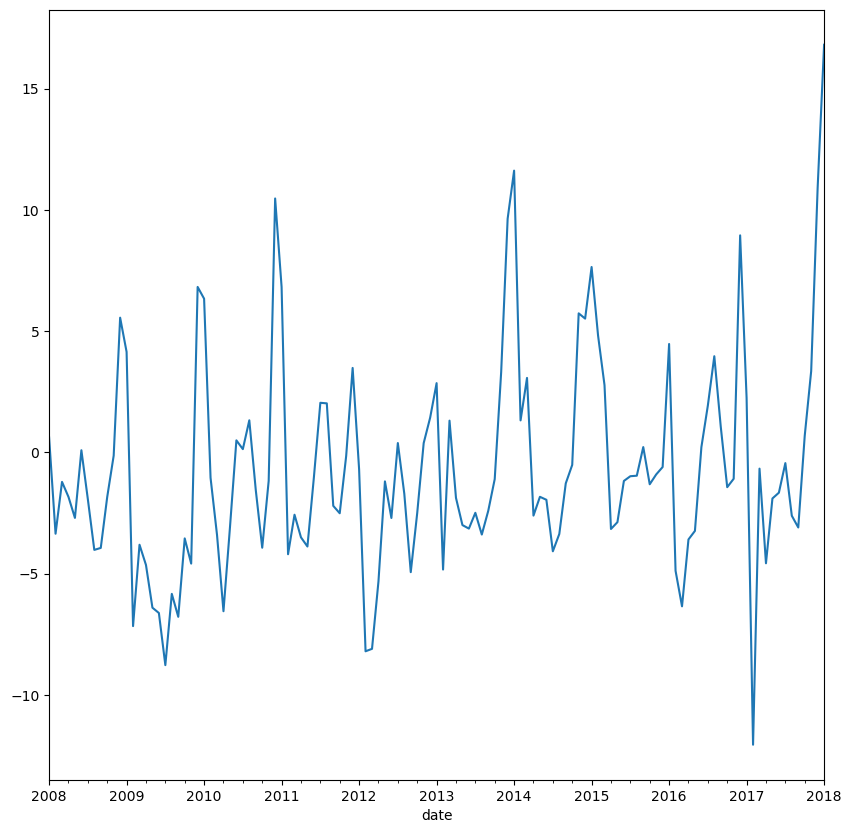

In [60]:
pred = arima_model_fit.predict(start = pred_start_date, end = pred_end_date)

residual_error = test_data['units'] - pred

residual_error.plot()

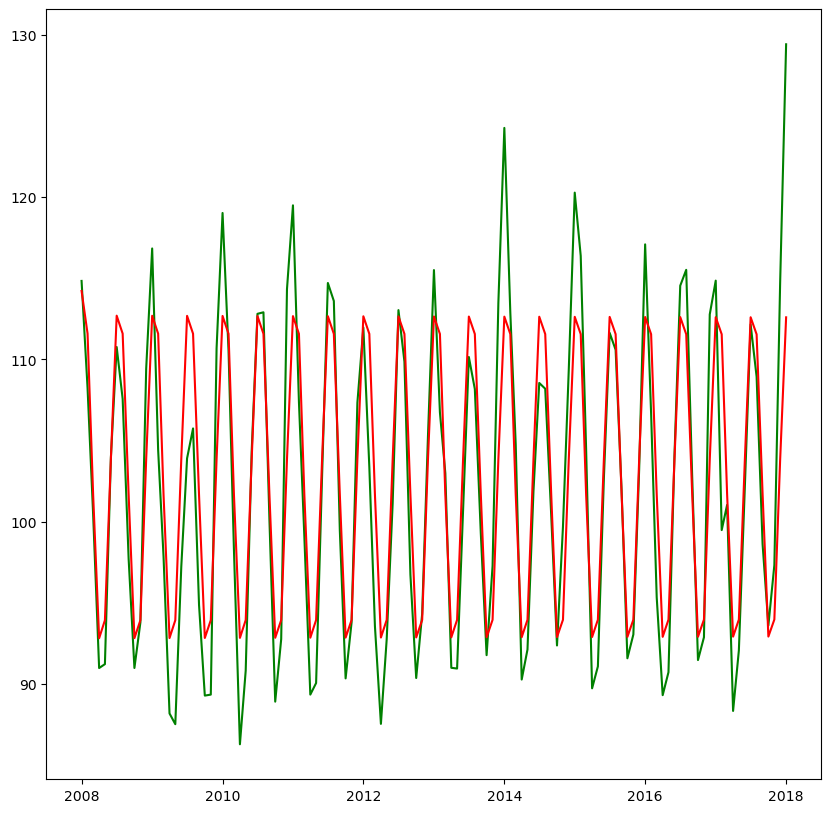

In [51]:
plt.plot(test_data['units'], color ='green')

plt.plot(pred, color = 'red')

# Let's predict ARIMA mode

In [80]:
from pandas.tseries.offsets import DateOffset
future_dates_arima=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [81]:
future_datest_df_arima=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [82]:
future_datest_df_arima.head(2)

,units,difference first units,Seasonal first Units
2018-02-01,NaN,NaN,NaN
2018-03-01,NaN,NaN,NaN


In [83]:
future_df_new_arima=pd.concat([df,future_datest_df])

In [84]:
future_df_new_arima.head()

,units,difference first units,Seasonal first Units
1985-01-01,72.5052,NaN,NaN
1985-02-01,70.6720,-1.8332,NaN
1985-03-01,62.4502,-8.2218,NaN
1985-04-01,57.4714,-4.9788,NaN
1985-05-01,55.3151,-2.1563,NaN


<Axes: >

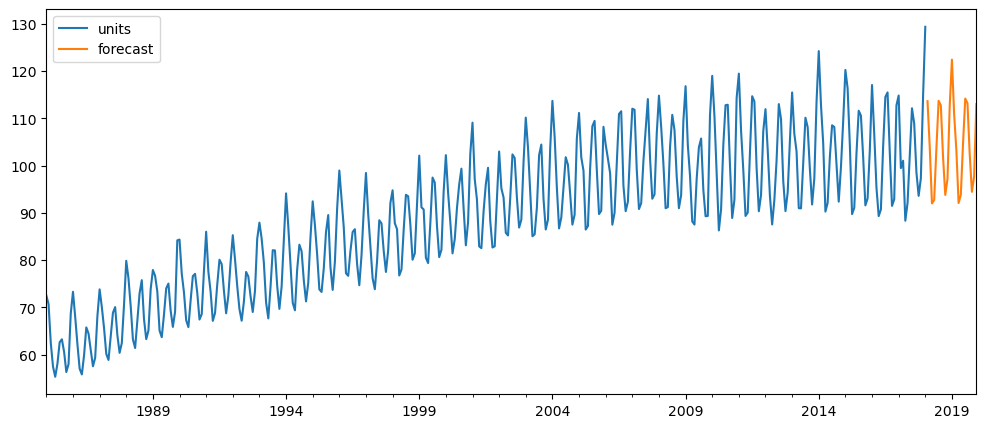

In [85]:
future_df_new_arima['forecast'] = results.predict(start = '2018-02-01', end = '2019-12-01', dynamic= True)  
future_df_new_arima[['units', 'forecast']].plot(figsize=(12, 5))

# SARIMAX model

In [33]:
import statsmodels.api as sm # Shrimax

In [79]:
model=sm.tsa.statespace.SARIMAX(df['units'],order=(2, 1, 4),seasonal_order=(1,1,1,12))
results=model.fit()
results.summary()

C:\Users\Anil modi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anil modi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                units   No. Observations:                  397
Model:             SARIMAX(2, 1, 4)x(1, 1, [1], 12)   Log Likelihood                -885.652
Date:                              Thu, 21 Dec 2023   AIC                           1789.305
Time:                                      20:38:09   BIC                           1824.860
Sample:                                  01-01-1985   HQIC                          1803.408
                                       - 01-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2607      0.300      0.870      0.384      -0.326       0.848
ar.L2         -0.4806      0.204     -2.361      0.018      -0.880      -0.082
ma.L1         -0.6644      0.291     -2.280      0.023      -1.236      -0.093
ma.L2          0.2669      0.287      0.929      0.353      -0.296       0.830
ma.L3         -0.1630      0.098     -1.660      0.097      -0.355       0.029
ma.L4         -0.3069      0.079     -3.898      0.000      -0.461      -0.153
ar.S.L12       0.0461      0.059      0.785      0.432      -0.069       0.161
ma.S.L12      -0.7804      0.043    -18.214      0.000      -0.864      -0.696
sigma2         5.7081      0.349     16.378      0.000       5.025       6.391
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                33.46
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               2.91   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

print(pred_start_date)
print(pred_end_date)

2008-01-01 00:00:00
2018-01-01 00:00:00


<Axes: xlabel='date'>

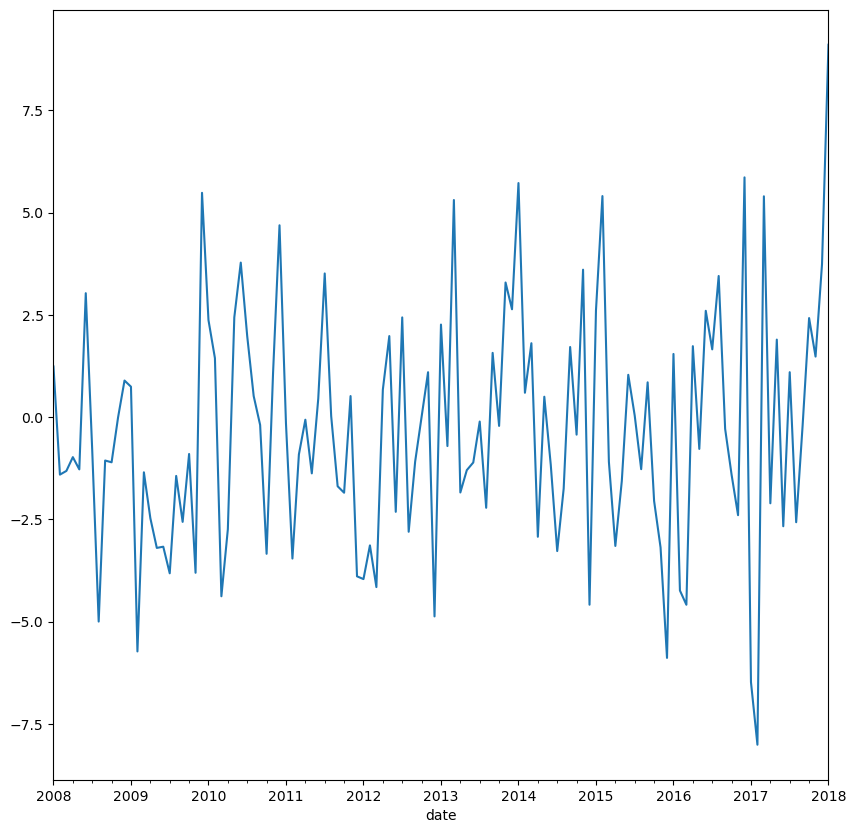

In [63]:
pred_1 = results.predict(start = pred_start_date, end = pred_end_date)

residual_error = test_data['units'] - pred_1

residual_error.plot()

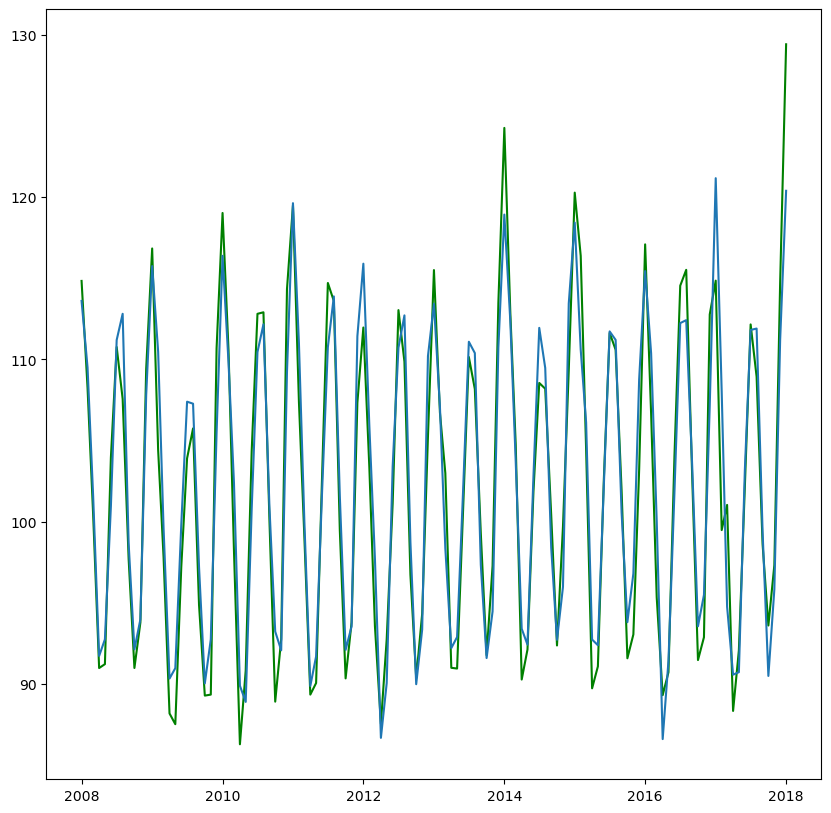

In [37]:
plt.plot(test_data['units'], color ='green')

plt.plot(pred_1)

## Let's Some prediction for future months

In [64]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [65]:
[df.index[-1] +DateOffset(months=x) for x in range(0,24)]

[Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-02-01 00:00:00'),
 Timestamp('2018-03-01 00:00:00'),
 Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00')]

In [66]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [67]:
future_datest_df

,units,difference first units,Seasonal first Units
2018-02-01,NaN,NaN,NaN
2018-03-01,NaN,NaN,NaN
2018-04-01,NaN,NaN,NaN
2018-05-01,NaN,NaN,NaN
2018-06-01,NaN,NaN,NaN
2018-07-01,NaN,NaN,NaN
2018-08-01,NaN,NaN,NaN
2018-09-01,NaN,NaN,NaN
2018-10-01,NaN,NaN,NaN
2018-11-01,NaN,NaN,NaN


In [68]:
future_df_new=pd.concat([df,future_datest_df])

In [69]:
future_df_new

,units,difference first units,Seasonal first Units
1985-01-01,72.5052,NaN,NaN
1985-02-01,70.6720,-1.8332,NaN
1985-03-01,62.4502,-8.2218,NaN
1985-04-01,57.4714,-4.9788,NaN
1985-05-01,55.3151,-2.1563,NaN
...,...,...,...
2019-08-01,NaN,NaN,NaN
2019-09-01,NaN,NaN,NaN
2019-10-01,NaN,NaN,NaN
2019-11-01,NaN,NaN,NaN


<Axes: >

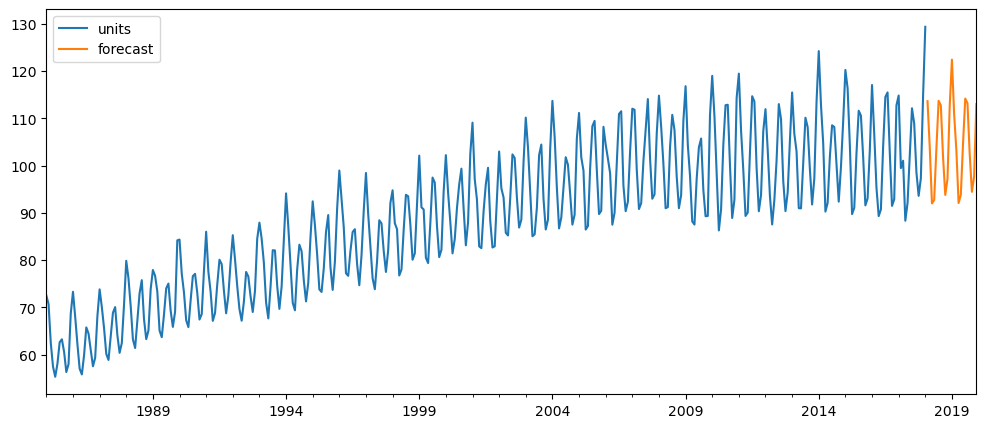

In [70]:
future_df_new['forecast'] = results.predict(start = '2018-02-01', end = '2019-12-01', dynamic= True)  
future_df_new[['units', 'forecast']].plot(figsize=(12, 5))

In [71]:
future_df_new

,units,difference first units,Seasonal first Units,forecast
1985-01-01,72.5052,NaN,NaN,NaN
1985-02-01,70.6720,-1.8332,NaN,NaN
1985-03-01,62.4502,-8.2218,NaN,NaN
1985-04-01,57.4714,-4.9788,NaN,NaN
1985-05-01,55.3151,-2.1563,NaN,NaN
...,...,...,...,...
2019-08-01,NaN,NaN,NaN,113.231170
2019-09-01,NaN,NaN,NaN,102.517297
2019-10-01,NaN,NaN,NaN,94.463275
2019-11-01,NaN,NaN,NaN,97.751949


<Axes: >

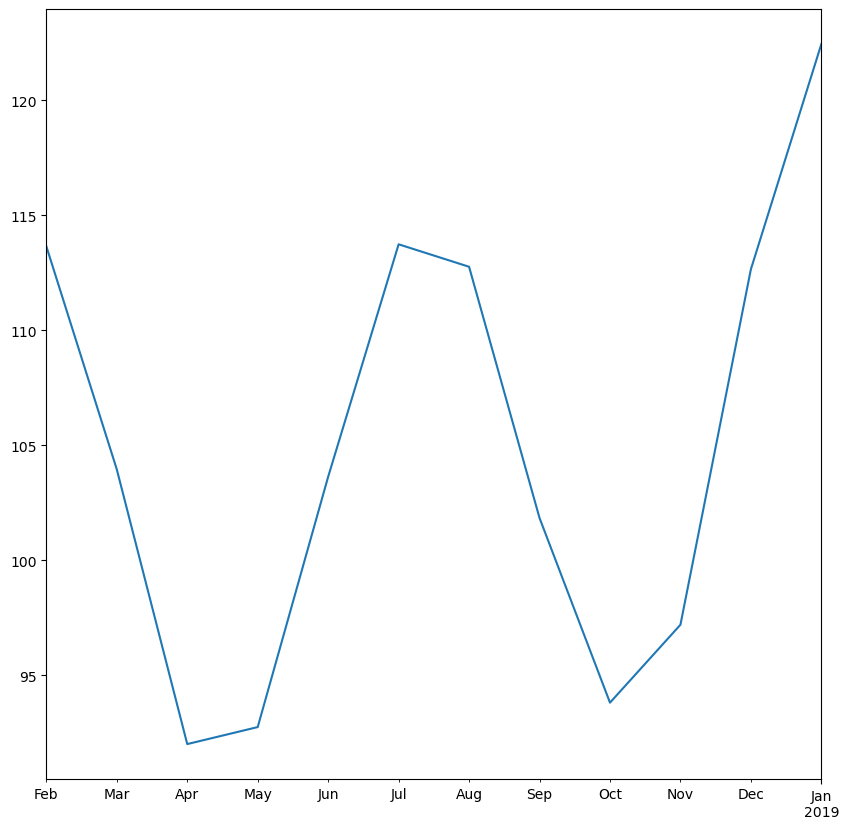

In [72]:
future_df_new['2018-02-01': '2019-01-01']['forecast'].plot()